In [97]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Control de nulos en DataFrame

## DATASET: Diabetes

**Variables incorporadas**

    0. Numero de veces embarazada (NEMB).
    1. Concentracion de plasma de glucosa (GLU) 
    2. Presion arterial diastolica en mm Hg (PART).
    3. Grosor de piel en triceps en mm (GROS).
    4. 2-Hour serum insulin en mu U/ml (HUR).
    5. BMI (peso kg/(altura en m)^2 en (BMI).
    6. Funcion de prediccion de Diabetes (FPRED)
    7. Edad (años)  (AGE).
    8. Variable de clase (0 or 1)  (CLASS).

In [98]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'
df = pd.read_csv(url, sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
# Cómo saber si tiene datos faltantes?
df.info()
# df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [100]:
valores = df.values
valores

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [101]:
# reemplazar los valores NaN con el valor de la media x columna
# otras estrategias: median
imputador = SimpleImputer(missing_values=np.nan, strategy='mean')

In [102]:
transformados = imputador.fit_transform(valores)
transformados = pd.DataFrame(transformados)
transformados

,0,1,2,3,4,5,6,7,8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [103]:
# Rellenar utilizando pandas
df.fillna(df.mean(), inplace=True)
df.shape

(768, 9)

## DATASET: Lluvias

In [104]:
df_lluvias_arc = pd.read_csv('../datasets/pune_1965_to_2002.csv')
df_lluvias_arc.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [105]:
df_lluvias_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    38 non-null     int64  
 1   Jan     38 non-null     float64
 2   Feb     38 non-null     float64
 3   Mar     38 non-null     float64
 4   Apr     38 non-null     float64
 5   May     38 non-null     float64
 6   Jun     38 non-null     float64
 7   Jul     38 non-null     float64
 8   Aug     38 non-null     float64
 9   Sep     38 non-null     float64
 10  Oct     38 non-null     float64
 11  Nov     38 non-null     float64
 12  Dec     38 non-null     float64
dtypes: float64(12), int64(1)
memory usage: 4.0 KB


In [106]:
valores = df_lluvias_arc.values[:, 1:]
indice = list(df_lluvias_arc.Year)
columnas = df_lluvias_arc.columns[1:]

In [107]:
df_lluvias = pd.DataFrame(valores, index=indice, columns=columnas)
df_lluvias

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951
1970,0.070,0.000,0.001,16.218,68.036,300.546,330.502,283.476,158.640,115.758,0.260,0.000
1971,0.000,0.000,0.000,0.812,57.691,297.187,122.195,372.693,286.056,39.424,0.554,0.000
1972,0.000,0.029,0.000,5.982,19.101,132.413,338.484,68.741,120.415,1.078,24.089,0.143
1973,0.000,2.969,0.234,3.925,14.978,304.484,696.024,256.932,183.206,101.805,5.516,0.000
1974,0.000,0.000,6.427,16.864,51.209,148.697,405.359,319.651,288.533,188.876,0.260,0.000


In [108]:
# sumatoria por mes
df_lluvias.sum()

Jan       11.186
Feb       41.843
Mar       63.733
Apr      470.487
May      952.272
Jun    12809.663
Jul    16340.395
Aug    10529.357
Sep     7642.245
Oct     2783.320
Nov      958.492
Dec      230.646
dtype: float64

In [109]:
# sumatoria x año
df_lluvias.sum(axis='columns').head()

1965    1263.394
1966     899.588
1967    1522.184
1968    1086.237
1969    1739.022
dtype: float64

In [110]:
# media por mes
df_lluvias.mean()

Jan      0.294368
Feb      1.101132
Mar      1.677184
Apr     12.381237
May     25.059789
Jun    337.096395
Jul    430.010395
Aug    277.088342
Sep    201.111711
Oct     73.245263
Nov     25.223474
Dec      6.069632
dtype: float64

In [111]:
# media por año
df_lluvias.mean(axis='columns').head()

1965    105.282833
1966     74.965667
1967    126.848667
1968     90.519750
1969    144.918500
dtype: float64

In [112]:
df_lluvias.describe().round(2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00,38.00
mean,0.29,1.10,1.68,12.38,25.06,337.10,430.01,277.09,201.11,73.25,25.22,6.07
std,0.64,1.74,2.49,13.67,22.45,171.67,177.98,132.25,123.74,62.94,31.81,11.73
min,0.00,0.00,0.00,0.06,0.51,94.09,84.94,59.39,44.57,1.08,0.26,0.00
25%,0.00,0.00,0.00,2.29,7.01,226.18,322.46,183.15,105.94,21.97,3.73,0.00
50%,0.01,0.25,0.60,5.49,18.14,312.10,415.08,243.23,180.97,49.83,14.69,0.50
75%,0.25,1.95,2.08,19.80,33.07,412.57,555.28,401.22,242.43,115.66,37.01,4.15
max,3.01,8.41,9.62,53.27,80.54,773.74,780.01,541.58,613.52,225.90,122.81,37.68


## DATASET: US Presidentes

In [113]:
presidents = pd.read_csv('../datasets/us_presidents 2.csv')
presidents.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [114]:
# serie con columna 'president'
presidents_names = pd.Series(presidents['president'])
presidents_names.head()

0    George Washington
1           John Adams
2     Thomas Jefferson
3        James Madison
4         James Monroe
Name: president, dtype: object

In [115]:
# mayusculas
presidents_names.str.upper().head()

0    GEORGE WASHINGTON
1           JOHN ADAMS
2     THOMAS JEFFERSON
3        JAMES MADISON
4         JAMES MONROE
Name: president, dtype: object

In [116]:
# longitud
presidents_names.str.len().head()

0    17
1    10
2    16
3    13
4    12
Name: president, dtype: int64

In [117]:
# que comiencen con 'j'
presidents_names.str.startswith('J').head()

0    False
1     True
2    False
3     True
4     True
Name: president, dtype: bool

In [118]:
presidents_names.str.endswith('n').head()

0     True
1    False
2     True
3     True
4    False
Name: president, dtype: bool

# Series de tiempo

In [119]:
fecha = pd.to_datetime('03/01/2020', dayfirst=True)
fecha

Timestamp('2020-01-03 00:00:00')

In [120]:
fecha_fin = pd.to_datetime('10/02/2020', dayfirst=True)
fecha_fin

Timestamp('2020-02-10 00:00:00')

In [121]:
fechas = pd.date_range(start=fecha, end=fecha_fin)
fechas

DatetimeIndex(['2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
               '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18',
               '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
               '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30',
               '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03',
               '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07',
               '2020-02-08', '2020-02-09', '2020-02-10'],
              dtype='datetime64[ns]', freq='D')

In [122]:
fechas_2 = pd.date_range(start=fecha, periods=8, freq='M')
fechas_2

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31'],
              dtype='datetime64[ns]', freq='M')

## DATAFRAME: US Presidents

In [123]:
pres_fechas_orig = presidents['start']
pres_fechas_orig.head()

0    April 30, 1789
1     March 4, 1797
2     March 4, 1801
3     March 4, 1809
4     March 4, 1817
Name: start, dtype: object

In [124]:
pres_fechas = pd.DatetimeIndex(pres_fechas_orig)
pres_fechas

DatetimeIndex(['1789-04-30', '1797-03-04', '1801-03-04', '1809-03-04',
               '1817-03-04', '1825-03-04', '1829-03-04', '1837-03-04',
               '1841-03-04', '1841-04-04', '1845-03-04', '1849-03-04',
               '1850-07-09', '1853-03-04', '1857-03-04', '1861-03-04',
               '1865-04-15', '1869-03-04', '1877-03-04', '1881-03-04',
               '1881-09-19', '1885-03-04', '1889-03-04', '1893-03-04',
               '1897-03-04', '1901-09-14', '1909-03-04', '1913-03-04',
               '1921-03-04', '1923-08-02', '1929-03-04', '1933-03-04',
               '1945-04-12', '1953-01-20', '1961-01-20', '1963-11-22',
               '1969-01-20', '1974-08-09', '1977-01-20', '1981-01-20',
               '1989-01-20', '1993-01-20', '2001-01-20', '2009-01-20',
               '2017-01-20'],
              dtype='datetime64[ns]', name='start', freq=None)

In [125]:
pres_series = pd.Series(presidents_names.values, index=pres_fechas)
pres_series.head()

start
1789-04-30    George Washington
1797-03-04           John Adams
1801-03-04     Thomas Jefferson
1809-03-04        James Madison
1817-03-04         James Monroe
dtype: object

# Manejo de datos DATASET: BITCOIN

In [126]:
df_bitcoin = pd.read_csv('../datasets/BTCUSD_1hr.csv')
df_bitcoin.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811


In [127]:
df_bitcoin.describe()

,Unix Timestamp,Open,High,Low,Close,Volume
count,3.946500e+04,39465.000000,39465.000000,39465.000000,39465.000000,39465.000000
mean,6.182322e+11,4817.778638,4844.889457,4788.678433,4817.963371,158.393961
std,7.614885e+11,3925.257801,3954.058698,3893.325248,3925.202322,300.774291
min,1.444309e+09,0.000000,243.600000,0.000000,243.600000,0.000000
25%,1.479827e+09,741.740000,743.000000,740.020000,741.800000,18.164575
50%,1.515344e+09,4142.120000,4165.380000,4118.390000,4142.590000,62.790643
75%,1.550862e+12,7908.480000,7950.000000,7860.750000,7908.480000,175.504078
max,1.586390e+12,19869.860000,19999.000000,19778.120000,19869.860000,8526.751048


In [128]:
df_bitcoin.isna()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
39460,False,False,False,False,False,False,False,False
39461,False,False,False,False,False,False,False,False
39462,False,False,False,False,False,False,False,False
39463,False,False,False,False,False,False,False,False


In [129]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])
df_bitcoin['Mes'] = df_bitcoin['Date'].dt.month
df_bitcoin.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume,Mes
0,1586390400000,2020-04-09 00:00:00,BTCUSD,7369.60,7369.60,7338.23,7338.23,7.788915,4
1,1586386800000,2020-04-08 23:00:00,BTCUSD,7367.28,7398.92,7348.47,7369.60,66.558293,4
2,1586383200000,2020-04-08 22:00:00,BTCUSD,7337.19,7390.25,7322.87,7367.28,88.486108,4
3,1586379600000,2020-04-08 21:00:00,BTCUSD,7327.70,7370.00,7311.33,7337.19,35.551553,4
4,1586376000000,2020-04-08 20:00:00,BTCUSD,7320.11,7375.72,7313.66,7327.70,153.655811,4


In [130]:
df_bitcoin.groupby('Mes').mean().round(2)

,Unix Timestamp,Open,High,Low,Close,Volume
Mes,,,,,,
1,6.262532e+11,5235.46,5272.55,5195.98,5234.95,139.06
2,6.295974e+11,4832.78,4861.65,4801.81,4832.80,142.18
3,6.283126e+11,4285.91,4313.61,4255.10,4284.48,162.84
4,4.650820e+11,3892.42,3910.03,3875.41,3893.96,134.80
5,3.906228e+11,4505.73,4529.27,4480.90,4506.58,180.04
6,4.364019e+11,4850.06,4875.86,4819.50,4850.56,175.73
7,7.744965e+11,5231.00,5260.42,5199.46,5231.36,210.21
8,7.758371e+11,5429.63,5453.53,5403.82,5429.84,171.75
9,7.771560e+11,5270.43,5290.12,5247.74,5269.70,159.68


# Graficando con Matplotlib

In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
mpl.style.use('bmh')

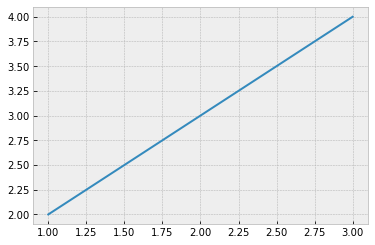

In [133]:
# Graficar linea recta

# Orientado a objetos (RECOMENDADO)
fig, ax = plt.subplots()
ax.plot([1,3], [2,4])

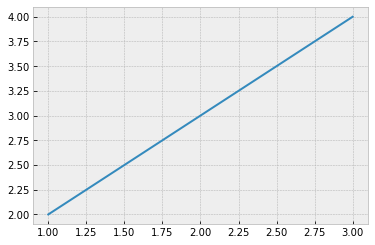

In [134]:
# Orientado a estados
plt.plot([1,3], [2,4])

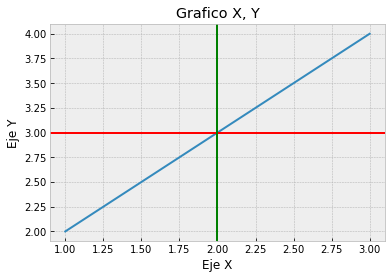

In [135]:
# Otras opciones
# fig: figura, ax: ejes
fig, ax = plt.subplots()
ax.plot([1,3], [2,4])

ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Grafico X, Y')

ax.axhline(y=3, xmin=0, xmax=4, color='r')
ax.axvline(x=2, ymin=0, ymax=10, color='g')

### Graficas de dataset Lluvia

In [136]:
df_lluvias = pd.read_csv('../datasets/pune_1965_to_2002.csv')
df_lluvias.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1,1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
2,1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
3,1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
4,1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [137]:
# poner Year como indice
df_lluvias.index = df_lluvias['Year']
df_lluvias = df_lluvias.drop('Year', axis='columns')
df_lluvias.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1965,0.029,0.069,0.000,21.667,17.859,102.111,606.071,402.521,69.511,5.249,16.232,22.075
1966,0.905,0.000,0.000,2.981,63.008,94.088,481.942,59.386,150.624,1.308,41.214,4.132
1967,0.248,3.390,1.320,13.482,11.116,251.314,780.006,181.069,183.757,50.404,8.393,37.685
1968,0.318,3.035,1.704,23.307,7.441,179.872,379.354,171.979,219.884,73.997,23.326,2.020
1969,0.248,2.524,0.334,4.569,6.213,393.682,678.354,397.335,205.413,24.014,24.385,1.951


In [138]:
x = df_lluvias.index
y = df_lluvias.sum(axis='columns')

#### Grafica de linea

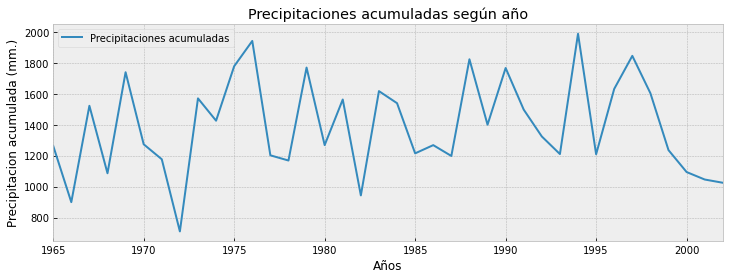

In [139]:
# figsize es el tamaño de la figura
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(x, y, label='Precipitaciones acumuladas')
ax.set_ylabel('Precipitacion acumulada (mm.)')
ax.set_xlabel('Años')
ax.set_title('Precipitaciones acumuladas según año')
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])
ax.legend(loc='best')

In [140]:
# Guardar la figura en la pc
fig.savefig('precipitaciones_año.pdf')

#### Grafica de puntos

C:\Users\alk10\AppData\Local\Temp\ipykernel_9972\754539189.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(mapeo_colores)


Text(0, 0.5, 'Precipitaciones en Septiembre (mm.)')

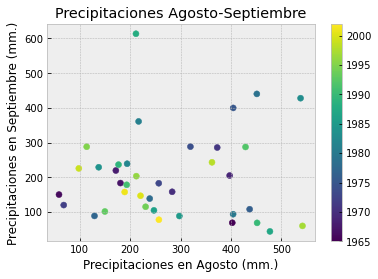

In [141]:
fig, ax = plt.subplots()  
mapeo_colores = ax.scatter(df_lluvias['Aug'], df_lluvias['Sep'], c=df_lluvias.index)
fig.colorbar(mapeo_colores)
ax.set_title('Precipitaciones Agosto-Septiembre')
ax.set_xlabel('Precipitaciones en Agosto (mm.)')
ax.set_ylabel('Precipitaciones en Septiembre (mm.)')

#### Grafica de barras

In [142]:
precipitaciones_acum = df_lluvias.sum()
precipitaciones_acum.head()

Jan     11.186
Feb     41.843
Mar     63.733
Apr    470.487
May    952.272
dtype: float64

Text(0.5, 0, 'Mes')

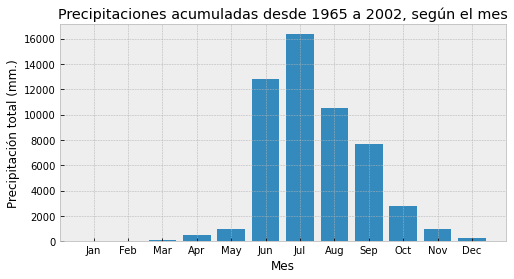

In [143]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(df_lluvias.columns, precipitaciones_acum)
ax.set_title('Precipitaciones acumuladas desde 1965 a 2002, según el mes')
ax.set_ylabel('Precipitación total (mm.)')
ax.set_xlabel('Mes')

#### Histograma: distribucion de frecuencia

In [144]:
# guarda los valores en un array
lluvias_flatten = df_lluvias.values.flatten()
lluvias_flatten

array([2.90000e-02, 6.90000e-02, 0.00000e+00, 2.16670e+01, 1.78590e+01,
       1.02111e+02, 6.06071e+02, 4.02521e+02, 6.95110e+01, 5.24900e+00,
       1.62320e+01, 2.20750e+01, 9.05000e-01, 0.00000e+00, 0.00000e+00,
       2.98100e+00, 6.30080e+01, 9.40880e+01, 4.81942e+02, 5.93860e+01,
       1.50624e+02, 1.30800e+00, 4.12140e+01, 4.13200e+00, 2.48000e-01,
       3.39000e+00, 1.32000e+00, 1.34820e+01, 1.11160e+01, 2.51314e+02,
       7.80006e+02, 1.81069e+02, 1.83757e+02, 5.04040e+01, 8.39300e+00,
       3.76850e+01, 3.18000e-01, 3.03500e+00, 1.70400e+00, 2.33070e+01,
       7.44100e+00, 1.79872e+02, 3.79354e+02, 1.71979e+02, 2.19884e+02,
       7.39970e+01, 2.33260e+01, 2.02000e+00, 2.48000e-01, 2.52400e+00,
       3.34000e-01, 4.56900e+00, 6.21300e+00, 3.93682e+02, 6.78354e+02,
       3.97335e+02, 2.05413e+02, 2.40140e+01, 2.43850e+01, 1.95100e+00,
       7.00000e-02, 0.00000e+00, 1.00000e-03, 1.62180e+01, 6.80360e+01,
       3.00546e+02, 3.30502e+02, 2.83476e+02, 1.58640e+02, 1.157

Text(0, 0.5, 'Frecuencia absoluta')

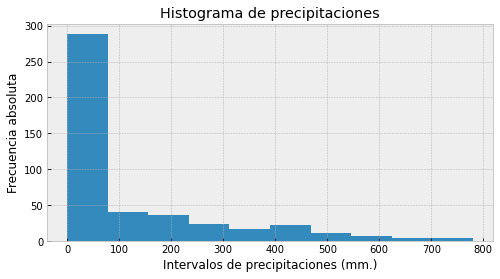

In [145]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(lluvias_flatten, bins=10)
ax.set_title('Histograma de precipitaciones')
ax.set_xlabel('Intervalos de precipitaciones (mm.)')
ax.set_ylabel('Frecuencia absoluta')

#### Mas visualizaciones

In [94]:
maximo_enero = df_lluvias['Jan'].max()
maximo_febrero =  df_lluvias['Feb'].max()

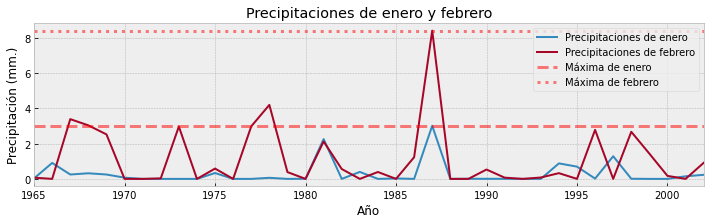

In [146]:
fig, ax = plt.subplots(figsize=(12, 3))  
ax.plot(df_lluvias.index, df_lluvias['Jan'], label='Precipitaciones de enero')
ax.plot(df_lluvias.index, df_lluvias['Feb'], label='Precipitaciones de febrero', color='C1')

ax.axhline(maximo_enero, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Máxima de enero')
ax.axhline(maximo_febrero, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de febrero')

ax.set_xlabel('Año')  
ax.set_ylabel('Precipitación (mm.)') 
ax.set_title('Precipitaciones de enero y febrero') 	
ax.set_xlim(df_lluvias.index[0], df_lluvias.index[-1])
ax.legend()

## Ejercicio de tarea

1. Escoger un dataset de los elegidos para la Clase 5
2. Cargar el archivo usando la función pd.read_csv() o pd.read_excel()
3. Elegir dos gráficos apropiados para el análisis (lineplot, scatterplot, barras, histograma, boxplot)
4. Realizar los gráficos seleccionados utilizando la interfaz orientada a objetos y a estados.